In [72]:
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

### Public debt data from ameco

In [73]:
df_public_debt=pd.read_csv("./ameco_public_debt.csv",skiprows=3)
del df_public_debt['Unit']

In [74]:
df_public_debt.head(10)

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,European Union,78.441854,79.375889,80.612506,81.919870,83.621636,85.340047,86.508290,88.698626,87.987798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union excluding UK,77.388518,78.410320,79.778488,81.377417,83.332296,85.780793,86.626386,88.599406,88.399491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,European Union (15 countries),82.230586,83.084167,84.215370,85.417536,86.904952,88.378441,89.634389,91.985100,91.078984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Euro area,84.138467,85.085531,86.412889,87.890652,89.817922,92.155206,93.033695,95.145246,94.916052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Euro area (12 countries),85.174312,86.080742,87.373099,88.821640,90.705034,93.012903,93.883606,96.024285,95.820014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Belgium,99.998982,99.630000,99.529029,100.047671,101.776148,104.885052,105.167153,106.986469,105.485645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bulgaria,18.636937,19.852412,21.140583,22.271611,25.323352,29.297953,25.989890,27.097981,17.063237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Czechia,30.131236,30.732012,31.469358,32.554049,34.662957,36.805509,39.955216,42.169378,44.908602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Denmark,31.667286,32.270631,33.009341,34.154149,35.483849,37.197603,39.773694,44.270265,44.045609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Germany,55.028648,56.774370,59.161447,61.865374,65.299523,69.206120,72.114275,75.669376,78.716951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_public_debt=pd.melt(df_public_debt,id_vars=["Country"],
                       var_name="Year",
                       value_name="Public debt")\
              .sort_values(by=["Country","Year"]).reset_index()

df_public_debt.head(50)

df_public_debt["Year"]=pd.to_datetime(df_public_debt['Year'])
df_public_debt=df_public_debt[df_public_debt.Year <= "2019-01-01"]

In [76]:
df_public_debt

,index,Country,Year,Public debt
0,2595,Albania,1960-01-01,NaN
1,2553,Albania,1961-01-01,NaN
2,2511,Albania,1962-01-01,NaN
3,2469,Albania,1963-01-01,NaN
4,2427,Albania,1964-01-01,NaN
...,...,...,...,...
2597,293,United States,2015-01-01,104.650191
2598,251,United States,2016-01-01,106.819076
2599,209,United States,2017-01-01,105.988432
2600,167,United States,2018-01-01,108.319574


In [77]:
def plotPublicDebt(country="Italy"):
    public_debt_italy=df_public_debt[df_public_debt.Country==country]

    years = mdates.YearLocator(2)   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')


    ### from pandas.plotting import register_matplotlib_converters

    fig,ax=plt.subplots(figsize=(18,10))
    plt.plot(public_debt_italy.Year,public_debt_italy["Public debt"],linewidth=3)

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    #ax.xaxis.set_minor_locator(months)
    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.grid()
    ax.axvspan(*mdates.datestr2num(['1983-08-04', '1987-04-17']), color='red', alpha=0.3,label="Craxi")
    ax.axvspan(*mdates.datestr2num(['1989-07-23', '1992-06-28']), color='yellow', alpha=0.3,label="Andreotti")
    ax.axvspan(*mdates.datestr2num(['1992-06-28', '1994-05-11']), color='blue', alpha=0.3,label="Amato/Ciampi")
    ax.axvspan(*mdates.datestr2num(['2011-11-16', '2013-04-28']), color='purple', alpha=0.3,label="Monti")

    _=plt.xlabel("Anno",fontsize=18)
    _=plt.ylabel("% di PIL",fontsize=18)
    fig.autofmt_xdate()
    _=plt.xticks(fontsize=15)
    _=plt.yticks(np.arange(25,150,10),fontsize=15)
    plt.legend(fontsize=15)
    plt.title("Debito pubblico italiano 1960-2019",fontsize=22)
    # tick every 5th easter
    plt.savefig("italy_pdebt.png",bbox_inches="tight")

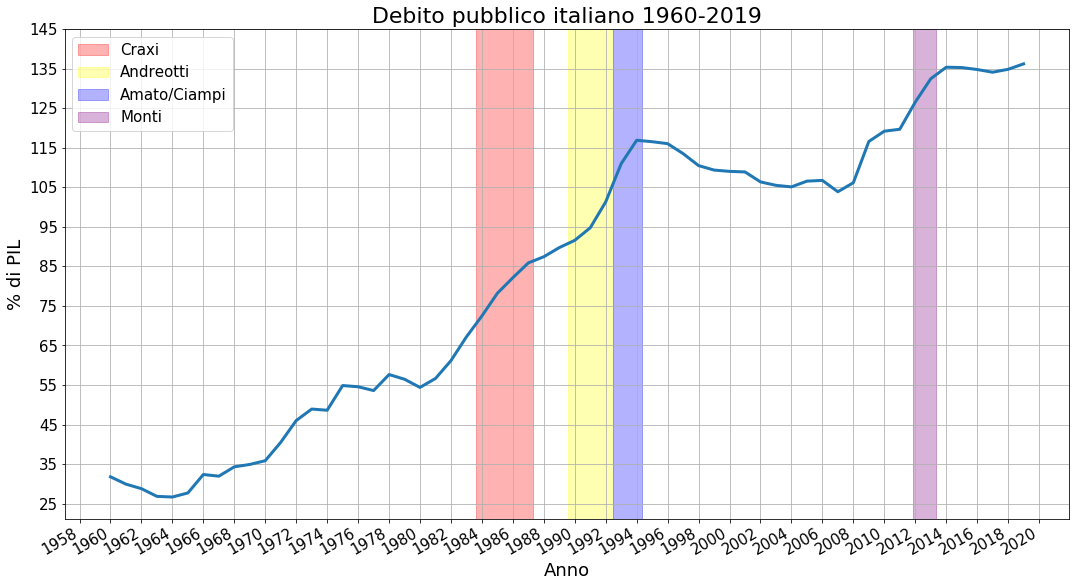

In [71]:
plotPublicDebt(country="Italy")

In [97]:
public_exp_interests=pd.read_csv("./spesa_pubblica_cat.csv")
public_exp_interests=public_exp_interests[["ANNI","Interessi","Rimborso di prestiti "]]
public_exp_interests.columns=["Year","Interests","Debt repayment"]
public_exp_interests["Interests"]=public_exp_interests["Interests"].apply(lambda x: x.replace(",",""))
public_exp_interests["Debt repayment"]=public_exp_interests["Debt repayment"].apply(lambda x: x.replace(",",""))
public_exp_interests["Interests"]=pd.to_numeric(public_exp_interests["Interests"])
public_exp_interests["Debt repayment"]=pd.to_numeric(public_exp_interests["Debt repayment"])
public_exp_interests["Debt service"]=public_exp_interests["Interests"]+public_exp_interests["Debt repayment"]
public_exp_interests=public_exp_interests[public_exp_interests.Year>=1960].set_index("Year")

In [32]:
public_exp_interests.head(10)

,Interests,Debt repayment,Debt service
Year,,,
1960,137607.87,85980.45,223588.32
1961,144258.81,128156.22,272415.03
1962,149787.22,138739.92,288527.14
1963,151151.18,127093.90,278245.08
1964,142496.14,85153.19,227649.33
1965,142608.73,131697.80,274306.53
1966,168281.28,237519.65,405800.93
1967,201173.39,56210.98,257384.37
1968,241197.25,219696.12,460893.37


In [33]:
public_exp_interests.head(10)

,Interests,Debt repayment,Debt service
Year,,,
1960,137607.87,85980.45,223588.32
1961,144258.81,128156.22,272415.03
1962,149787.22,138739.92,288527.14
1963,151151.18,127093.90,278245.08
1964,142496.14,85153.19,227649.33
1965,142608.73,131697.80,274306.53
1966,168281.28,237519.65,405800.93
1967,201173.39,56210.98,257384.37
1968,241197.25,219696.12,460893.37


In [41]:
public_exp_tot=pd.read_csv("./spesa_tot.csv")
public_exp_tot.columns=["Year","Public expenditure 2009 prices","Public expenditure"]
public_exp_tot["Public expenditure 2009 prices"]=public_exp_tot["Public expenditure 2009 prices"].apply(lambda x: x.replace(",",""))
public_exp_tot["Public expenditure"]=public_exp_tot["Public expenditure"].apply(lambda x: x.replace(",",""))

public_exp_tot["Public expenditure 2009 prices"]=pd.to_numeric(public_exp_tot["Public expenditure 2009 prices"])
public_exp_tot["Public expenditure"]=pd.to_numeric(public_exp_tot["Public expenditure"])
public_exp_tot=public_exp_tot[public_exp_tot.Year>=1960].set_index("Year")



In [58]:
## public_exp=public_exp_tot.join(public_exp_interests)
public_exp["Debt service frac"]=public_exp["Debt service"]/public_exp["Public expenditure"]
public_exp["Deflator"]=public_exp["Public expenditure"]/public_exp["Public expenditure 2009 prices"]
public_exp["Debt service 2009 prices"]=public_exp["Debt service"]/public_exp["Deflator"]
public_exp["Primary public expenditure 2009 prices"]=public_exp["Public expenditure 2009 prices"]-public_exp["Debt service 2009 prices"]


public_exp.index = pd.to_datetime(public_exp.index.astype(str))


In [59]:
public_exp

,Public expenditure 2009 prices,Public expenditure,Interests,Debt repayment,Debt service,Debt service frac,Deflator,Debt service 2009 prices,Primary public expenditure 2009 prices
Year,,,,,,,,,
1960-01-01,52403756.5,2215991.1,1.376079e+05,8.598045e+04,2.235883e+05,0.100898,0.042287,5.287416e+06,4.711634e+07
1961-01-01,55557898.0,2418041.9,1.442588e+05,1.281562e+05,2.724150e+05,0.112659,0.043523,6.259117e+06,4.929878e+07
1962-01-01,60660978.9,2774798.5,1.497872e+05,1.387399e+05,2.885271e+05,0.103981,0.045743,6.307607e+06,5.435337e+07
1963-01-01,62270193.6,3062503.7,1.511512e+05,1.270939e+05,2.782451e+05,0.090855,0.049181,5.657585e+06,5.661261e+07
1964-01-01,66174714.7,3447497.5,1.424961e+05,8.515319e+04,2.276493e+05,0.066033,0.052097,4.369729e+06,6.180499e+07
1965-01-01,76425439.3,4154504.8,1.426087e+05,1.316978e+05,2.743065e+05,0.066026,0.054360,5.046088e+06,7.137935e+07
1966-01-01,84992447.1,4712691.4,1.682813e+05,2.375196e+05,4.058009e+05,0.086108,0.055448,7.318539e+06,7.767391e+07
1967-01-01,82823126.9,4684248.1,2.011734e+05,5.621098e+04,2.573844e+05,0.054947,0.056557,4.550864e+06,7.827226e+07
1968-01-01,109470864.8,6270275.8,2.411972e+05,2.196961e+05,4.608934e+05,0.073504,0.057278,8.046599e+06,1.014243e+08


In [69]:
cols_to_plot=["Public expenditure 2009 prices","Debt service 2009 prices","Primary public expenditure 2009 prices"]
for c in cols_to_plot:
    public_exp[c]=(public_exp[c]*1000)/1e9

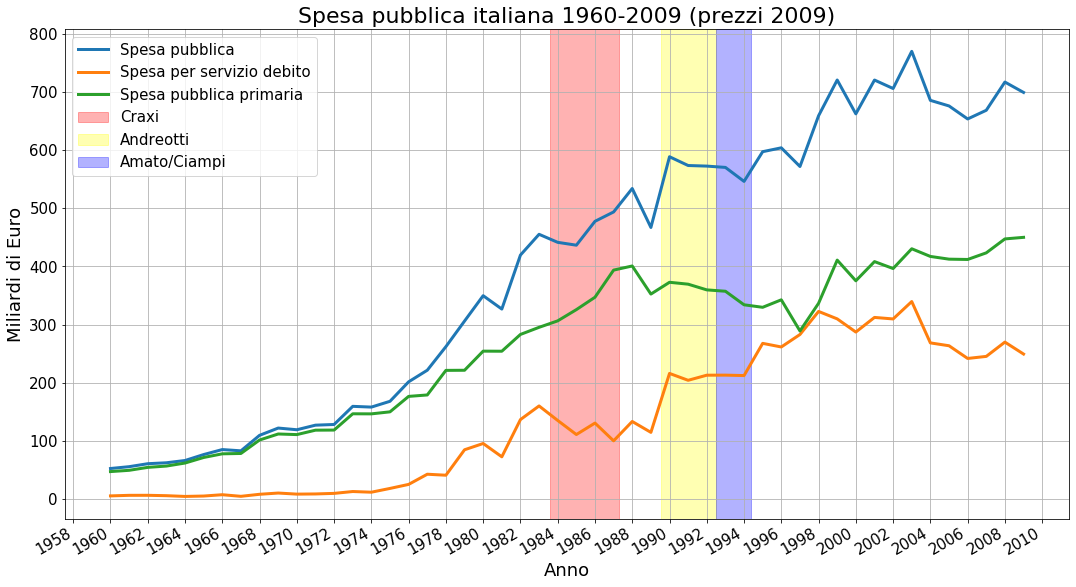

In [78]:
years = mdates.YearLocator(2)   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig,ax=plt.subplots(figsize=(18,10))


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)
# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.plot(public_exp.index,public_exp["Public expenditure 2009 prices"],linewidth=3,label="Spesa pubblica")
plt.plot(public_exp.index,public_exp["Debt service 2009 prices"],linewidth=3,label="Spesa per servizio debito")
plt.plot(public_exp.index,public_exp["Primary public expenditure 2009 prices"],linewidth=3,label="Spesa pubblica primaria")
ax.axvspan(*mdates.datestr2num(['1983-08-04', '1987-04-17']), color='red', alpha=0.3,label="Craxi")
ax.axvspan(*mdates.datestr2num(['1989-07-23', '1992-06-28']), color='yellow', alpha=0.3,label="Andreotti")
ax.axvspan(*mdates.datestr2num(['1992-06-28', '1994-05-11']), color='blue', alpha=0.3,label="Amato/Ciampi")
#ax.axvspan(*mdates.datestr2num(['2011-11-16', '2013-04-28']), color='purple', alpha=0.3,label="Monti")
plt.grid()
plt.legend(fontsize=15)
_=plt.xlabel("Anno",fontsize=18)
_=plt.ylabel("Miliardi di Euro",fontsize=18)
fig.autofmt_xdate()
_=plt.xticks(fontsize=15)
_=plt.yticks(fontsize=15)
_=plt.title("Spesa pubblica italiana 1960-2009 (prezzi 2009)",fontsize=22)

### Gdp

In [277]:
gdp=pd.read_csv("./italy_gdp.csv",skiprows=3)
del gdp["Unit"]
deflator = pd.read_csv("./deflator.csv",skiprows=3)
del deflator["Unit"]

In [278]:
#deflator.head(10)

In [279]:
gdp=pd.melt(gdp,id_vars="Country",value_name="GDP 2015",var_name="Year")
deflator=pd.melt(deflator,id_vars="Country",value_name="Deflator 2015",var_name="Year")

gdp_italy=gdp[gdp.Country=="Italy"].set_index("Year")
del gdp_italy["Country"]
deflator_italy=deflator[deflator.Country=="Italy"].set_index("Year")

In [284]:
## gdp_italy_1=deflator_italy.join(gdp_italy)
gdp_italy_1["GDP Current"] = (gdp_italy_1["GDP 2015"]*gdp_italy_1["Deflator 2015"])/100
deflator_2015_2009 = float(gdp_italy_1[gdp_italy_1.index=="2009"]["Deflator 2015"])
gdp_italy_1["Deflator 2009"] = 100*(gdp_italy_1["Deflator 2015"]/deflator_2015_2009)
gdp_italy_1["GDP 2009"] = (gdp_italy_1["GDP Current"]/gdp_italy_1["Deflator 2009"])*100
gdp_italy_1.index = pd.to_datetime(gdp_italy_1.index)


In [285]:
#price_2009=float(gdp[(gdp.Country=="Italy") & (gdp.Year=='2009')]["GDP"])
#price_2015=float(gdp[(gdp.Country=="Italy") & (gdp.Year=='2015')]["GDP"])


In [286]:
deflator_2015_2009

93.6664773

# 

In [287]:
gdp_italy_1.head(15)

,Country,Deflator 2015,GDP 2015,GDP Current,Deflator 2009,GDP 2009
Year,,,,,,
2021-01-01,Italy,105.350515,1740.234,1833.345478,112.474087,1630.015885
2020-01-01,Italy,104.255179,1727.752,1801.270935,111.304686,1618.324435
2019-01-01,Italy,103.309467,1720.314,1777.247231,110.295028,1611.357522
2018-01-01,Italy,102.729461,1718.515,1765.421195,109.675803,1609.672462
2017-01-01,Italy,101.834945,1705.310,1736.601494,108.720801,1597.303804
2016-01-01,Italy,101.136389,1676.538,1695.589998,107.975011,1570.354085
2015-01-01,Italy,100.000000,1655.355,1655.355000,106.761782,1550.512715
2014-01-01,Italy,99.076740,1642.571,1627.405797,105.776093,1538.538393
2013-01-01,Italy,98.180119,1642.646,1612.751791,104.818844,1538.608643


In [290]:
piublic_exp_gdp=public_exp.join(gdp_italy_1[["GDP 2009","GDP current"]])
piublic_exp_gdp[""]

KeyError: "['GDP current'] not in index"

In [155]:
gdp_italy[["Year","GDP"]]

,Year,GDP
19,2021,1770.250015
70,2020,1757.552723
121,2019,1749.986430
172,2018,1748.156400
223,2017,1734.723637
...,...,...
2926,1964,563.349037
2977,1963,541.893236
3028,1962,510.176453
3079,1961,476.880900
